In [40]:
# import modules
import pandas as pd
pd.options.display.max_colwidth=500
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import typing
nltk.download('stopwords')
nltk.download('wordnet')
import re
#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
#packages to build our knn model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
     # Enter your own credentials obtained
        # from your developer account
        consumer_key = "AKJRvPwuZS686p1dxkTx3WDnV"
        consumer_secret = "MZ2dakCiJtGBzBkpfTVMFHIlPlwJjYV1bOZg5RN0qIRKxi8d6i"
        access_key = "1498368813867413505-CosP8pC5BUHY9W730ZbjcNhaA9Gk0m"
        access_secret = "eBAL5p7c4DYZVGsIPpRYHQObsAt1HEBsomcGYjUEAwT47"
 

In [42]:
alltweets = []
# Defining the function to get the tweets
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    totaltweets = [[tweet.created_at,tweet._json["user"]["name"],tweet.user.description,tweet.user.statuses_count,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.retweet_count,tweet.retweeted,tweet.text,
                  tweet._json["user"]["location"]] for tweet in alltweets]
     
    tweets_df = pd.DataFrame(columns = ["time","name","totaltweets","description","hashtags","user_mentions","favorite_count",
                                    "lang","following","followers_count","retweet_count","retweeted",
                                    "text","location"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in totaltweets])
    tweets_df["name"] = pd.Series([str(i[1]) for i in totaltweets])
    tweets_df["description"] = pd.Series([str(i[2]) for i in totaltweets])
    tweets_df["totaltweets"] = pd.Series([str(i[3]) for i in totaltweets])            
    tweets_df["hashtags"] = pd.Series([str(i[4]) for i in totaltweets])
    tweets_df["user_mentions"] = pd.Series([str(i[5]) for i in totaltweets])
    tweets_df["favorite_count"] = pd.Series([str(i[6]) for i in totaltweets])
    tweets_df["lang"] = pd.Series([str(i[7]) for i in totaltweets])
    tweets_df["following"] = pd.Series([str(i[8]) for i in totaltweets])
    tweets_df["followers_count"] = pd.Series([str(i[9]) for i in totaltweets])
    tweets_df["retweet_count"] = pd.Series([str(i[10]) for i in totaltweets])
    tweets_df["retweeted"] = pd.Series([str(i[11]) for i in totaltweets])
    tweets_df["text"] = pd.Series([str(i[12]) for i in totaltweets])
    tweets_df["location"] = pd.Series([str(i[13]) for i in totaltweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [43]:
oleksatweets = get_all_tweets("@avalaina")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...2000 tweets downloaded so far
...2059 tweets downloaded so far
...2059 tweets downloaded so far


In [44]:
#overview of oleksa tweets
oleksatweets.head()

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
0,2022-05-02 12:18:57+00:00,Oleksandra Matviichuk,2059,head of the Center for Civil Liberties (Ukraine)/ Democracy Defender Award of OSCE 2016,[],[],430,en,67,152441,72,False,"This is a young couple Stanislav and Oksana Krasnova, and another fighter unknown to me. Ukrainians join the Armed… https://t.co/IG3780K61a","Kyiv, Ukraine"
1,2022-05-02 09:26:39+00:00,Oleksandra Matviichuk,2059,head of the Center for Civil Liberties (Ukraine)/ Democracy Defender Award of OSCE 2016,"[{'text': 'StandWithUkraine', 'indices': [97, 114]}]",[],1301,en,67,152441,220,False,"In the Kyiv region, storks built a nest on a house destroyed during the fighting.\nPhoto UAnimals\n#StandWithUkraine https://t.co/pEHDGtZ3UM","Kyiv, Ukraine"
2,2022-05-01 17:59:38+00:00,Oleksandra Matviichuk,2059,head of the Center for Civil Liberties (Ukraine)/ Democracy Defender Award of OSCE 2016,[],[],345,en,67,152441,244,False,"Deputies of the Krasnoyarsk region have officially decided to export grain from the occupied Kherson region, forcib… https://t.co/rwrfMOlE1h","Kyiv, Ukraine"
3,2022-05-01 16:58:21+00:00,Oleksandra Matviichuk,2059,head of the Center for Civil Liberties (Ukraine)/ Democracy Defender Award of OSCE 2016,[],[],3110,en,67,152441,524,False,"""If we die, the Ukrainian flag will proudly hang on our coffins and we will be proudly returned to our land""- Bosni… https://t.co/Fe70QGBhKh","Kyiv, Ukraine"
4,2022-05-01 16:47:58+00:00,Oleksandra Matviichuk,2059,head of the Center for Civil Liberties (Ukraine)/ Democracy Defender Award of OSCE 2016,[],[],5124,en,67,152441,544,False,"In March, guardsman Maxim became a father for the first time. And a month later he finally saw his son.\nFor the sak… https://t.co/OYP2iGZXjU","Kyiv, Ukraine"


In [45]:
oleksatweets.describe(exclude='number')

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
count,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059
unique,2044,1,1,1,347,378,808,20,1,2,794,1,2059,1
top,2022-04-25 14:15:49+00:00,Oleksandra Matviichuk,2059,head of the Center for Civil Liberties (Ukraine)/ Democracy Defender Award of OSCE 2016,[],[],0,en,67,152441,0,False,"Elena Racheva: One of the people killed in Ukrainian Odesa by a direct hit of a Russian rocket, was 28 y.o Valeria… https://t.co/hjmDbGwyIe","Kyiv, Ukraine"
freq,3,2059,2059,2059,1656,1472,741,1256,2059,1800,283,2059,1,2059


In [46]:
oleksatweets .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             2059 non-null   object
 1   name             2059 non-null   object
 2   totaltweets      2059 non-null   object
 3   description      2059 non-null   object
 4   hashtags         2059 non-null   object
 5   user_mentions    2059 non-null   object
 6   favorite_count   2059 non-null   object
 7   lang             2059 non-null   object
 8   following        2059 non-null   object
 9   followers_count  2059 non-null   object
 10  retweet_count    2059 non-null   object
 11  retweeted        2059 non-null   object
 12  text             2059 non-null   object
 13  location         2059 non-null   object
dtypes: object(14)
memory usage: 225.3+ KB


In [47]:
#measuring hashtahs
oleksatweets['hashtags'].value_counts().loc[lambda x : x>1].to_frame()

,hashtags
[],1656
"[{'text': 'SaveOlegSentsov', 'indices': [0, 16]}]",5
"[{'text': 'StandWithUkraine', 'indices': [98, 115]}]",5
"[{'text': 'StandWithUkraine', 'indices': [82, 99]}]",5
"[{'text': 'StandWithUkraine', 'indices': [88, 105]}]",5
"[{'text': 'StandWithUkraine', 'indices': [86, 103]}]",4
"[{'text': 'StandWithUkraine', 'indices': [68, 85]}]",4
"[{'text': 'RussianWarCrimes', 'indices': [79, 96]}]",3
"[{'text': 'StandWithUkraine️', 'indices': [97, 115]}]",3
"[{'text': 'StandWithUkraine', 'indices': [58, 75]}]",3


In [48]:
#display the most user mentions
oleksatweets['user_mentions'].value_counts().loc[lambda x : x>20].to_frame()

,user_mentions
[],1472
"[{'screen_name': 'sosmaydan', 'name': 'Євромайдан SOS', 'id': 2222903959, 'id_str': '2222903959', 'indices': [3, 13]}]",50
"[{'screen_name': 'olgatokariuk', 'name': 'Olga Tokariuk', 'id': 1359532099, 'id_str': '1359532099', 'indices': [3, 16]}]",22


In [76]:
#which tweet got the most likes
print(oleksatweets ['favorite_count'].max())
oleksatweets.loc[oleksatweets ['favorite_count'] == oleksatweets ['favorite_count'].max()]['text']

129850


1017    Andriy Piddubny: My colleague, Anastasiia Yalanskaya died yesterday. Nastya was shot dead by Russian troops while d… https://t.co/KsMbNBFUEi
Name: text, dtype: object

In [77]:
#which tweet got the most retweets
print(oleksatweets ['retweet_count'].max())
oleksatweets.loc[oleksatweets ['retweet_count'] == oleksatweets ['retweet_count'].max()]['text']

84159


382    RT @lapatina_: Ukrainian mothers are writing their family contacts on the bodies of their children in case they get killed and the child su…
Name: text, dtype: object

In [51]:
sid_analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    return df
#find all top scoring tweets
def print_top_n_tweets(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Tweet: {row[0]}")

In [52]:
oleksatweets  = get_sentiment_scores(oleksatweets ,'text')
tweet_sentiment = oleksatweets [['text','text Positive Sentiment Score','text Negative Sentiment Score']]

In [53]:
tweet_sentiment.head()

,text,text Positive Sentiment Score,text Negative Sentiment Score
0,"This is a young couple Stanislav and Oksana Krasnova, and another fighter unknown to me. Ukrainians join the Armed… https://t.co/IG3780K61a",0.183,0.000
1,"In the Kyiv region, storks built a nest on a house destroyed during the fighting.\nPhoto UAnimals\n#StandWithUkraine https://t.co/pEHDGtZ3UM",0.000,0.275
2,"Deputies of the Krasnoyarsk region have officially decided to export grain from the occupied Kherson region, forcib… https://t.co/rwrfMOlE1h",0.000,0.000
3,"""If we die, the Ukrainian flag will proudly hang on our coffins and we will be proudly returned to our land""- Bosni… https://t.co/Fe70QGBhKh",0.232,0.125
4,"In March, guardsman Maxim became a father for the first time. And a month later he finally saw his son.\nFor the sak… https://t.co/OYP2iGZXjU",0.000,0.000


In [54]:
#Top positive tweets
print_top_n_tweets(tweet_sentiment,'text Positive Sentiment Score',10)

Score: 0.652, Tweet: @MalcolmNance Good choice. I like this place. Agreed 🤝
Score: 0.506, Tweet: RT @Dunja_Mijatovic: Honored to meet wonderful, courageous #humanrights defender and activist Oleksandra Matviychuk #DemAward17 #Ukraine @S…
Score: 0.5, Tweet: не дякуйте :) https://t.co/geVpg6WecX
Score: 0.5, Tweet: @olevtsun спасибо, я в процессе :)
Score: 0.484, Tweet: Help them retun home alive. 
Sign: https://t.co/wyQ2maDv5l  
Join: https://t.co/kHrTQDx49b
#FreeDonbasHostages
https://t.co/6xlzrFiwGS
Score: 0.469, Tweet: Tetiana Bezruk: God! If you really exist, please help us.
#StandWithUkraine https://t.co/uzQTIucT3B
Score: 0.455, Tweet: @antytila_offic @edsheeran Great idea! @edsheeran please, stand with Ukraine 🇺🇦
Score: 0.451, Tweet: Dear friends, please, help us to spread this message. We need shelter from the sky. #CloseTheSky https://t.co/VoTIoqp3Fd
Score: 0.437, Tweet: Ukraine has shown its strength,  commitment to democracy and freedom. It's time for the EU to show the strengt

In [55]:
#Top negative tweets
print_top_n_tweets(tweet_sentiment,'text Negative Sentiment Score',10)

Score: 0.556, Tweet: RT @olgatokariuk: No empathy for the suffering of Ukrainians, no remorse for years of spreading anti-Ukrainian propaganda and hate. No unde…
Score: 0.504, Tweet: 2.Sexual violence is a method of Russian warfare. These rapes are part of terror against civilian population puprpo… https://t.co/mavEsh1H5f
Score: 0.467, Tweet: War in children's drawings. Poor children, they are still trying to comprehend this horror
#StandWithUkraine️ https://t.co/dTN7FSWPkx
Score: 0.447, Tweet: “Based on my experience … war crimes and especially… illegally detained people, political persecution, torture, and… https://t.co/JZ4QTZNLPr
Score: 0.438, Tweet: RT @OlenaHalushka: Realize the full scale of putin's latest war crime in #Mariupol:
- they destroyed homes of people
- trapped them in town…
Score: 0.436, Tweet: Marichka Paplauskaite: I was terribly ashamed to ask for help - when people die and destinies are ruined, it is a s… https://t.co/TPOSqJsL3i
Score: 0.433, Tweet: We are develop

In [56]:
oleksatweets ['retweet_count']= oleksatweets ['retweet_count'].astype('int64')
oleksatweets ['favorite_count']= oleksatweets ['favorite_count'].astype('int64')

In [57]:
features= oleksatweets[['retweet_count','favorite_count','text Positive Sentiment Score','text Negative Sentiment Score']]
features.corr()

,retweet_count,favorite_count,text Positive Sentiment Score,text Negative Sentiment Score
retweet_count,1.000000,0.343149,0.016389,0.137190
favorite_count,0.343149,1.000000,0.072454,0.072216
text Positive Sentiment Score,0.016389,0.072454,1.000000,-0.027569
text Negative Sentiment Score,0.137190,0.072216,-0.027569,1.000000


<AxesSubplot:>

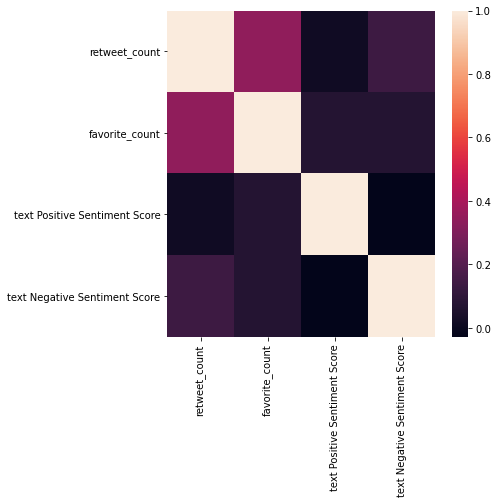

In [58]:
#correlation map
plt.figure(figsize= (6, 6))
sns.heatmap(features.corr())

In [59]:
 #Import english stop words

stopcorpus: typing.List = stopwords.words('english')

In [60]:
# Convert to lowercase, and remove stop words

def remove_links(text):
    # Remove any hyperlinks that may be in the text starting with http
    return re.sub(r"http\S+", "", text)

def style_text(text:str):
    # Convert to lowercase
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    # Remove all words as specified in a custom list of words
    return [item for item in text_data if item not in list_of_words_to_remove]

def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

def remove_apostrophes(text):
    # Remove any apostrophes as these are irrelavent in our word cloud
    text = text.replace("'", "")
    text = text.replace('"', "")
    text = text.replace('`', "")
    return text

def remove_others(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove @mentions
    text = re.sub(r'#','',text) # Remove hashtag symbols
    text = re.sub(r'RT[\s]+','',text) # Remove retweets
    text = re.sub(r'Ukraine','',text) 
    text = re.sub(r'ukraine','',text) 
    text = re.sub(r'ukrainian','',text)
    text = re.sub(r'amp','',text)
    text = re.sub(r'rt','',text)
    text = re.sub(r'Russia','',text) 
    text = re.sub(r'russia','',text) 
    return text

In [61]:
tweet_sentiment['cleaned_text'] = tweet_sentiment.loc[:,'text'].astype(str).apply(remove_links)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(style_text)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(collapse_list_to_string)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_apostrophes)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_others)

<ipython-input-61-2ade89cc017e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-61-2ade89cc017e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-61-2ade89cc017e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-61-2ade89c

In [62]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


tweet_sentiment['clean_lemmatized'] = tweet_sentiment['cleaned_text'].astype(str).apply(lemmatize_text)

tweet_sentiment['clean_lemmatized'] = tweet_sentiment['clean_lemmatized'].apply(collapse_list_to_string)

display(tweet_sentiment['clean_lemmatized'].head(5))

<ipython-input-62-3e2f8e3d0251>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-3e2f8e3d0251>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0           young couple stanislav oksana krasnova, another fighter unknown me. s join armed…
1            kyiv region, stork built nest house destroyed fighting. photo uanimals standwith
2    deputy krasnoyarsk region officially decided expo grain occupied kherson region, forcib…
3                              if die, flag proudly hang coffin proudly returned land- bosni…
4          march, guardsman maxim became father first time. month later finally saw son. sak…
Name: clean_lemmatized, dtype: object

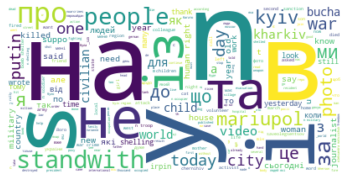

In [63]:
def plot_wordcloud(series,output_filename='wordcloud'):

    wordcloud = WordCloud(max_font_size=150, max_words=500, background_color="white").generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

plot_wordcloud(tweet_sentiment['clean_lemmatized'],'overall-wordcloud')

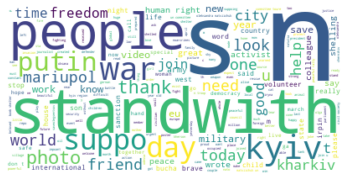

In [64]:
def plot_wordcloud_top_n(df,number_of_tweets,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_tweets,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(tweet_sentiment,500,'text Positive Sentiment Score','clean_lemmatized','positive-wordcloud')

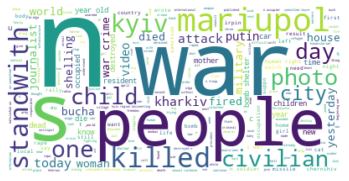

In [65]:
plot_wordcloud_top_n(tweet_sentiment,500,'text Negative Sentiment Score','clean_lemmatized','negative-wordcloud')

In [66]:
#retweets distribution over time
fig = px.line(oleksatweets, x="time", y= oleksatweets['retweet_count'])
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [67]:
df=oleksatweets [['time', 'retweet_count','text Positive Sentiment Score','text Negative Sentiment Score']]
pos=oleksatweets [['time', 'retweet_count','text Positive Sentiment Score']]
neg =oleksatweets [['time', 'retweet_count','text Negative Sentiment Score']]
df[(df['time']>='2022-03-01') & (df['time']<='2022-04-01')]

,time,retweet_count,text Positive Sentiment Score,text Negative Sentiment Score
450,2022-03-31 22:52:57+00:00,1094,0.104,0.000
451,2022-03-31 22:27:07+00:00,5673,0.000,0.000
452,2022-03-31 20:50:20+00:00,76,0.095,0.000
453,2022-03-31 20:41:10+00:00,162,0.000,0.000
454,2022-03-31 20:38:04+00:00,21,0.216,0.074
...,...,...,...,...
1123,2022-03-01 09:12:31+00:00,37,0.000,0.241
1124,2022-03-01 09:10:35+00:00,25,0.000,0.000
1125,2022-03-01 08:44:17+00:00,30,0.076,0.124
1126,2022-03-01 07:29:22+00:00,63,0.155,0.255


In [68]:
#how retweets via sentiments are having an evolution over time
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['time'], y=pos['text Positive Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['time'], y=neg['text Negative Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [69]:

oleksatweets["is_viral"] = oleksatweets.retweet_count.apply(
    lambda row: 1 if row >= oleksatweets.retweet_count.mean()  else 0)

print(oleksatweets.is_viral.value_counts())

0    1753
1     306
Name: is_viral, dtype: int64


In [70]:
oleksatweets['tweet_length'] = oleksatweets.apply(lambda tweet: len(tweet['text']), axis=1)
oleksatweets["followers_count"] = oleksatweets.apply(lambda tweet: tweet["followers_count"], axis=1)
oleksatweets["friends_count"] = oleksatweets.apply(lambda tweet: tweet["following"], axis=1)

oleksatweets["hashtag_count"] = oleksatweets.apply(lambda tweet: tweet.text.count("#"), axis=1)
oleksatweets["link_count"] = oleksatweets.apply(lambda tweet: tweet.text.count("http"), axis=1)
oleksatweets["word_count"] = oleksatweets.apply(lambda tweet: len(tweet.text.split()), axis=1)

def find_avg_word_length(str):
    #function to find average word length of a string
    sum = 0
    for i in range(0, len(str.split())):
        sum = sum + len(str.split()[i])
    avg = sum/len(str.split())
    return avg

oleksatweets["avg_length_of_words"] = oleksatweets.text.apply(find_avg_word_length)

In [71]:


labels = oleksatweets[["is_viral"]]
features = oleksatweets[["tweet_length", "followers_count", "friends_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features = scale(features, axis=0)

features2 = oleksatweets[["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count"]]
scaled_features2 = scale(features2, axis=0)

features3 = oleksatweets[["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features3 = scale(features3, axis=0)

print(features.loc[0])
print(scaled_features[0])

tweet_length                        139
followers_count                  152441
friends_count                        67
text Positive Sentiment Score     0.183
text Negative Sentiment Score       0.0
Name: 0, dtype: object
[ 0.32940265 -0.37932689  0.          1.5247247  -0.62653013]


In [72]:


train_data, test_data, train_labels, test_labels = train_test_split(scaled_features3, labels, 
                                                                    test_size = 0.2,
                                                                    random_state=1)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.912621359223301

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

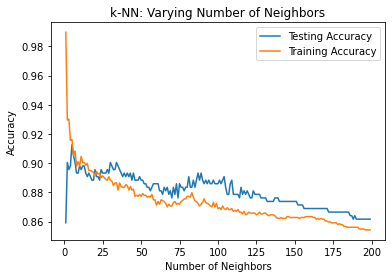

In [74]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 200)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
 # Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(n_neighbors=k)
 # Fit the classifier to the training data
 knn.fit(train_data, train_labels)
 
 #Compute accuracy on the training set
 train_accuracy[i] = knn.score(train_data, train_labels)
 #Compute accuracy on the testing set
 test_accuracy[i] = knn.score(test_data, test_labels)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [75]:
best_score = 0
best_k = 0

for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    if classifier.score(test_data, test_labels) > best_score:
        best_score = classifier.score(test_data, test_labels)
        best_k = k

print(best_k)
print(best_score)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

5
0.912621359223301


In [78]:
oleksatweets.to_csv('oleksatweets')